In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [44]:
# Load the datasets for 2021 and 2022
Data2021 = pd.read_csv(('/Users/lmc03/Library/CloudStorage/OneDrive-WentworthInstituteofTechnology/LMC_Individual_Project/Data/02745_2021.csv'), usecols=['DATE', 'TMAX', 'TMIN'], parse_dates=['DATE'])
Data2022 = pd.read_csv(('/Users/lmc03/Library/CloudStorage/OneDrive-WentworthInstituteofTechnology/LMC_Individual_Project/Data/2022_02745.csv'), usecols=['DATE', 'TMAX', 'TMIN'], parse_dates=['DATE'])

# Add derived columns for average temperature
Data2021['Average_Temp'] = (Data2021['TMAX'] + Data2021['TMIN']) / 2
Data2022['Average_Temp'] = (Data2022['TMAX'] + Data2022['TMIN']) / 2

# Combine datasets for overall analysis if needed
FullData = pd.concat([Data2021, Data2022])

In [45]:
# Question 1: Average daily temperature over the past year

# Convert the 'DATE' column to datetime
FullData['DATE'] = pd.to_datetime(FullData['DATE'])

# Filter data for 2021 and 2022z
data_2021 = FullData[FullData['DATE'].dt.year == 2021]
data_2022 = FullData[FullData['DATE'].dt.year == 2022]

# Calculate the average daily temperature for each year
average_daily_temp_2021 = data_2021['Average_Temp'].mean()
average_daily_temp_2022 = data_2022['Average_Temp'].mean()

# Print the results
print(f"Average Daily Temperature in 2021: {average_daily_temp_2021:.2f}°F")
print(f"Average Daily Temperature in 2022: {average_daily_temp_2022:.2f}°F")

Average Daily Temperature in 2021: 53.03°F
Average Daily Temperature in 2022: 52.40°F


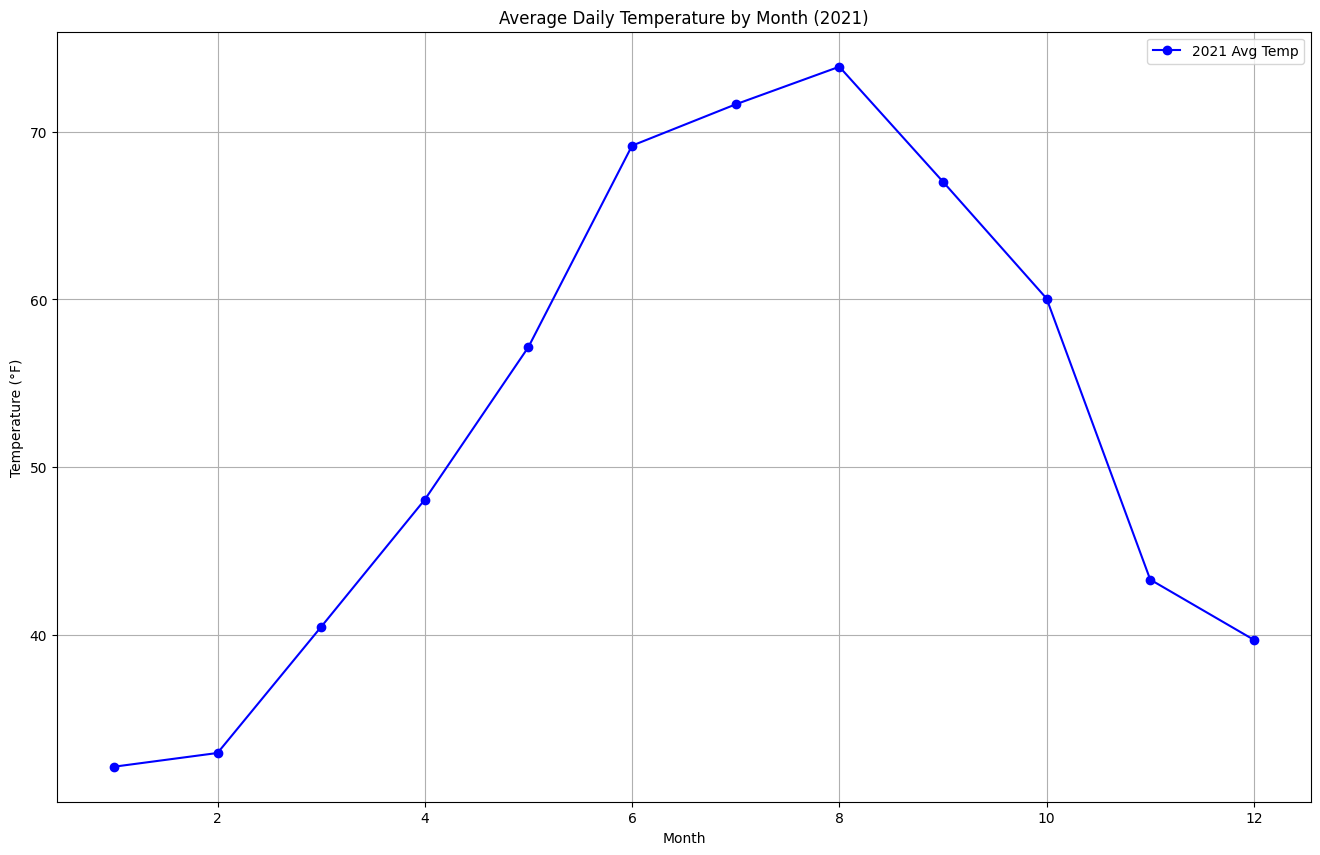

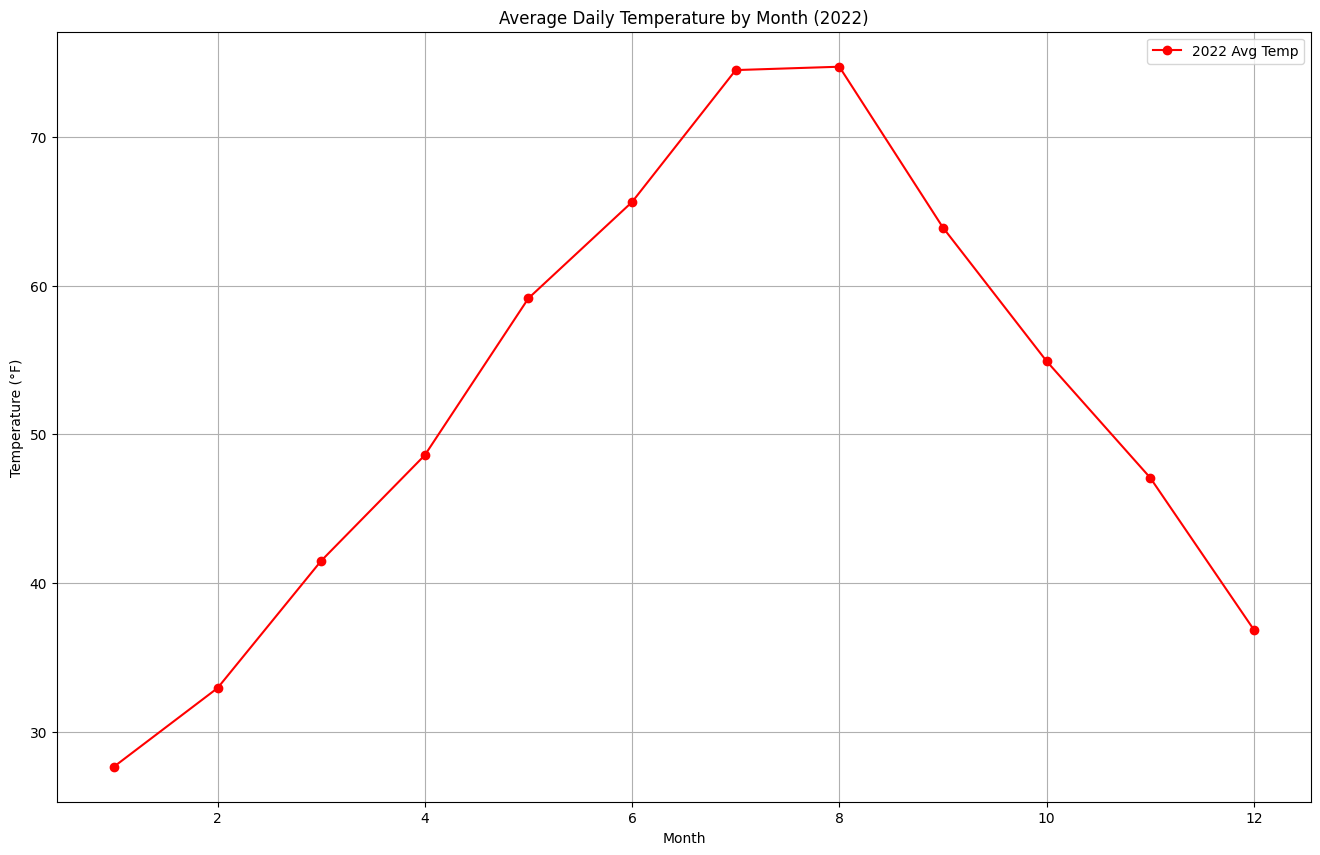

In [46]:
# Question 2: Daily temperature variation by month

# Convert the 'DATE' column to datetime
FullData['DATE'] = pd.to_datetime(FullData['DATE'])

# Extract month from the 'DATE' column
FullData['Month'] = FullData['DATE'].dt.month

# Filter data for 2021 and 2022
data_2021 = FullData[FullData['DATE'].dt.year == 2021]
data_2022 = FullData[FullData['DATE'].dt.year == 2022]

# Group by month and calculate the average temperature for each month in 2021 and 2022
monthly_avg_temp_2021 = data_2021.groupby('Month')['Average_Temp'].mean()
monthly_avg_temp_2022 = data_2022.groupby('Month')['Average_Temp'].mean()

# Plot for 2021
plt.figure(figsize=(10 * 1.618, 10))
plt.plot(monthly_avg_temp_2021.index, monthly_avg_temp_2021.values, marker='o', label='2021 Avg Temp', color='blue')
plt.title('Average Daily Temperature by Month (2021)')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend()
plt.show()

# Plot for 2022
plt.figure(figsize=(10 * 1.618, 10))
plt.plot(monthly_avg_temp_2022.index, monthly_avg_temp_2022.values, marker='o', label='2022 Avg Temp', color='red')
plt.title('Average Daily Temperature by Month (2022)')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend()
plt.show()

Sample Predictions for Max Temperature:
Min Temp: 30°F -> Predicted Max Temp: 50.67°F
Min Temp: 50°F -> Predicted Max Temp: 69.38°F
Min Temp: 70°F -> Predicted Max Temp: 88.10°F


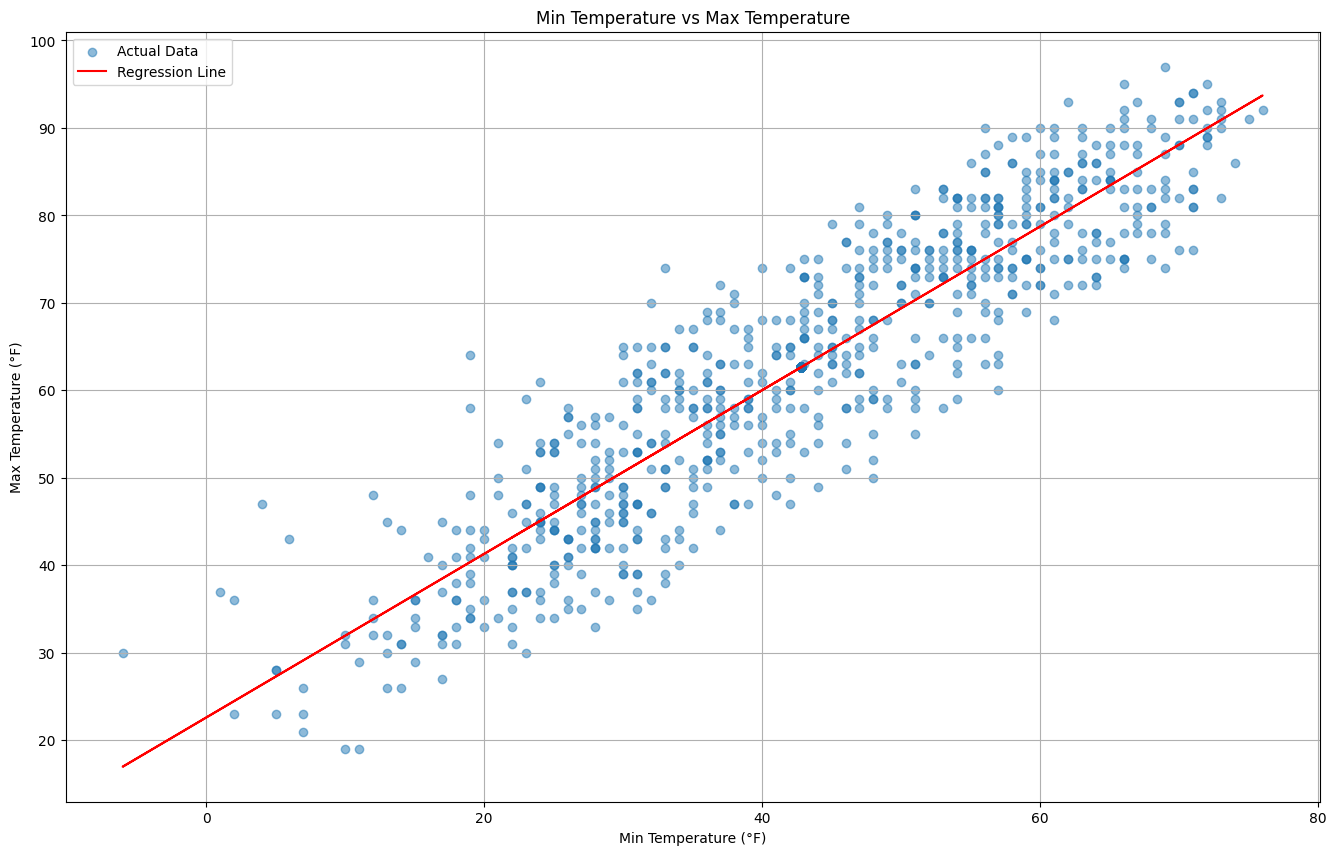

In [47]:
# Question 3: Predict daily max temperature based on min temperature

imputer = SimpleImputer(strategy='mean')
FullData['TMIN'] = imputer.fit_transform(FullData[['TMIN']])
FullData['TMAX'] = imputer.fit_transform(FullData[['TMAX']])

X = FullData['TMIN'].values.reshape(-1, 1) 
y = FullData['TMAX'].values  

model = LinearRegression()
model.fit(X, y)

# Predictions
sample_min_temps = np.array([30, 50, 70]).reshape(-1, 1)
predicted_max_temps = model.predict(sample_min_temps)
print("Sample Predictions for Max Temperature:")
for min_temp, max_temp in zip(sample_min_temps.flatten(), predicted_max_temps):
    print(f"Min Temp: {min_temp}°F -> Predicted Max Temp: {max_temp:.2f}°F")

plt.figure(figsize=(10 * 1.618, 10))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Min Temperature vs Max Temperature')
plt.xlabel('Min Temperature (°F)')
plt.ylabel('Max Temperature (°F)')
plt.legend()
plt.grid()
plt.show()

Predicted Average Temperature for Next Month (January 2023): 48.33°F


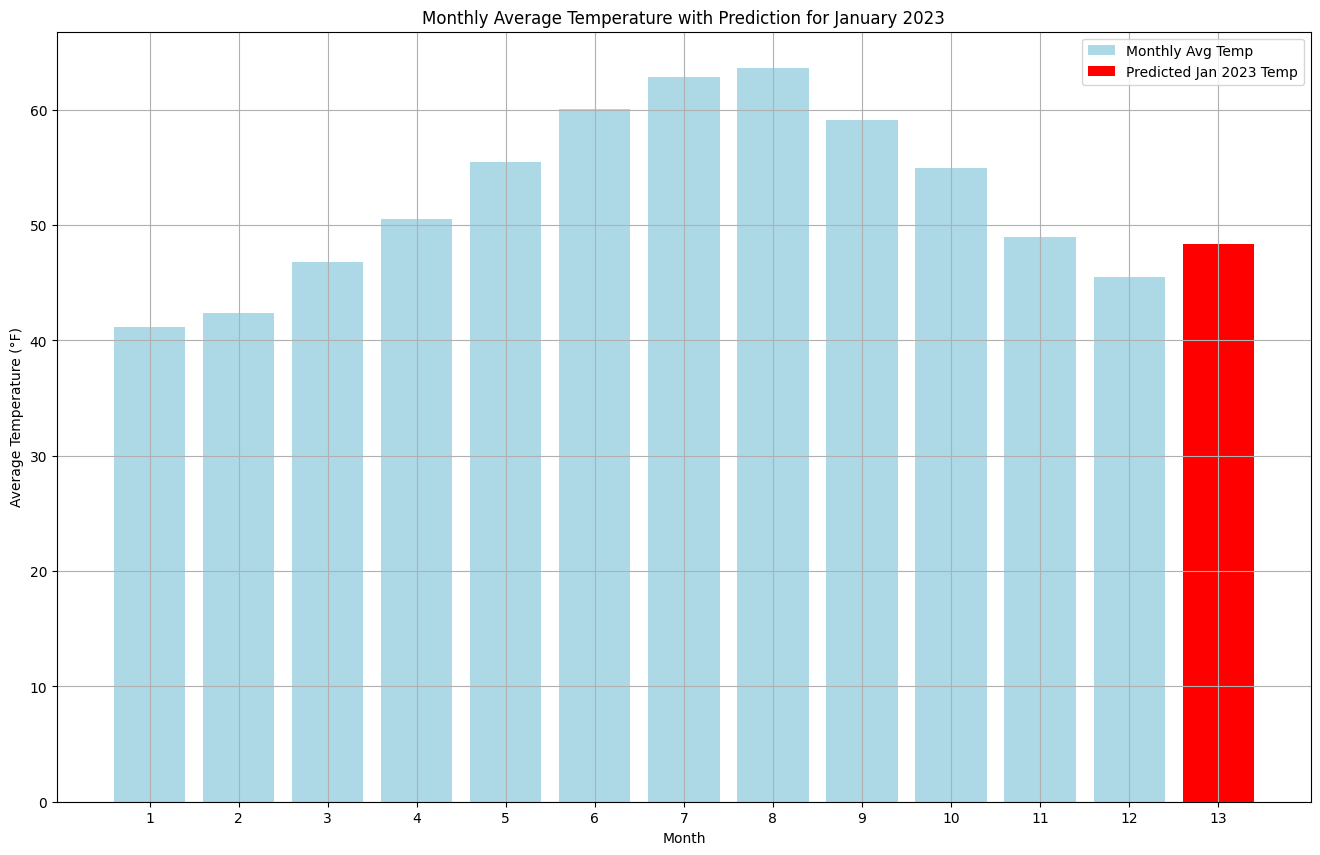

In [48]:
# Question 4: Predict next month's average temperature

# Impute missing values in the 'Average_Temp' column
imputer = SimpleImputer(strategy='mean')
FullData['Average_Temp'] = imputer.fit_transform(FullData[['Average_Temp']])

# Extract the year and month from the 'DATE' column
FullData['Year'] = FullData['DATE'].dt.year
FullData['Month'] = FullData['DATE'].dt.month

X_month = FullData['Month'].values.reshape(-1, 1)
y_avg_temp = FullData['Average_Temp'].values

model_month = LinearRegression()
model_month.fit(X_month, y_avg_temp)

# Predicting for the "13th" month (January of the next year)
next_month = [[1]]
predicted_temp = model_month.predict(next_month)
print(f"Predicted Average Temperature for Next Month (January 2023): {predicted_temp[0]:.2f}°F")

# Bar graph to show average temperature per month and the prediction for January 2023
plt.figure(figsize=(10 * 1.618, 10))

# Get the average temperature per month
monthly_avg_temp = FullData.groupby('Month')['Average_Temp'].mean()

# Plotting the bar graph for the monthly averages
plt.bar(monthly_avg_temp.index.astype(str), monthly_avg_temp.values, label='Monthly Avg Temp', color='lightblue')

# Prediction for January 2023
plt.bar('13', predicted_temp[0], color='red', label='Predicted Jan 2023 Temp')

# Title and labels
plt.title('Monthly Average Temperature with Prediction for January 2023')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

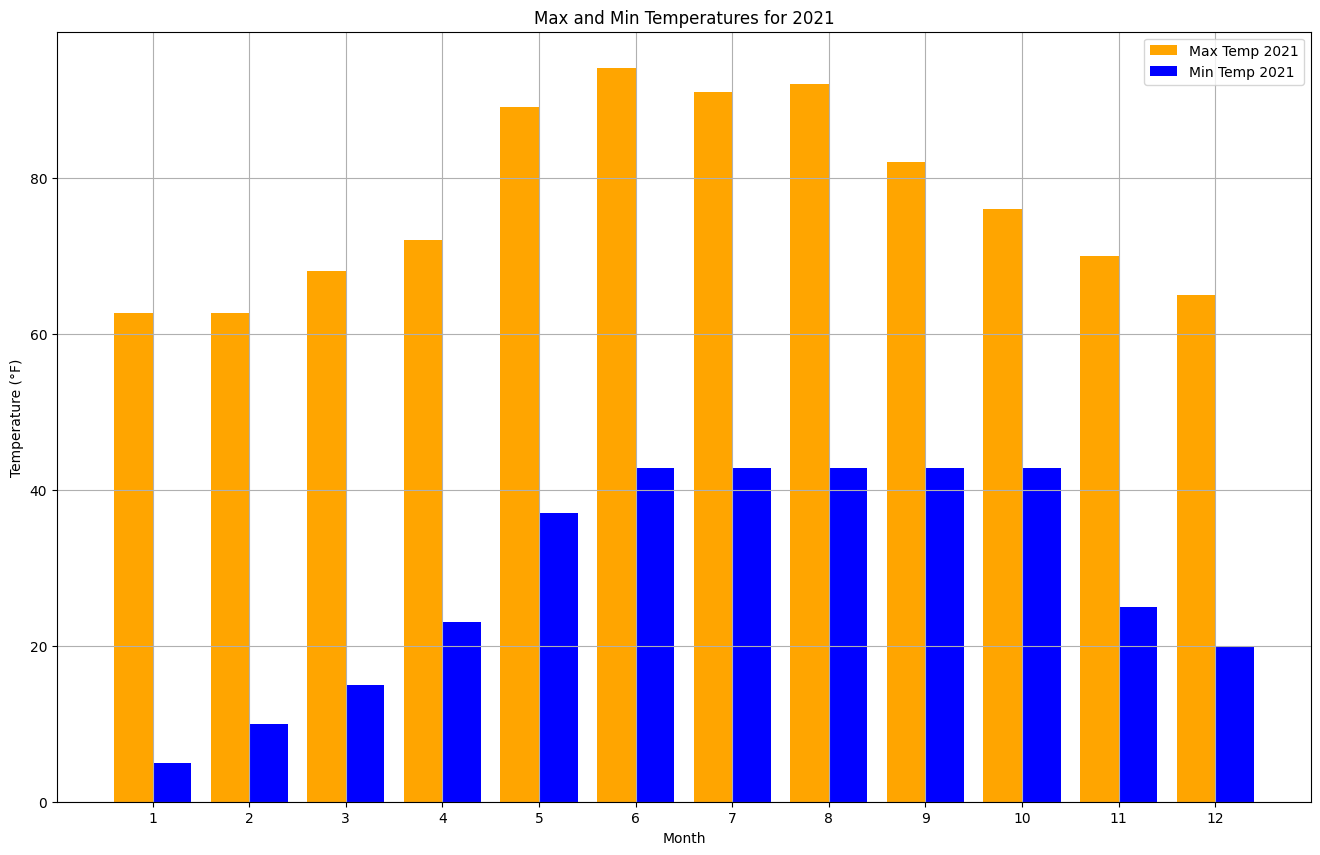

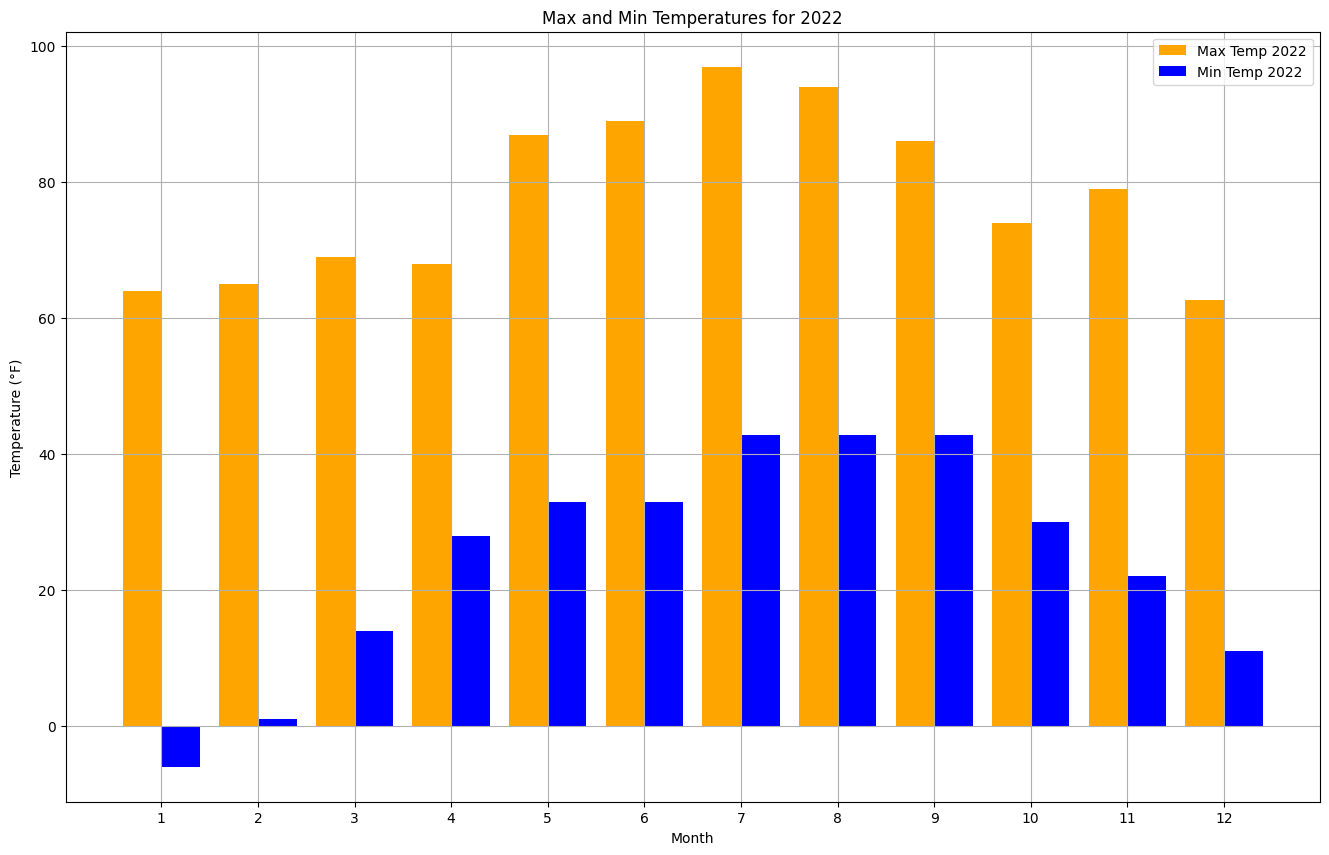

In [49]:

# Question 5: Highest and lowest range of temperatures recorded

# Filter out unreasonable high temperatures (e.g., temperatures above 100°F)
FullData = FullData[FullData['TMAX'] < 100]

# Filter out unreasonable low temperatures (e.g., temperatures below -50°F)
FullData = FullData[FullData['TMIN'] > -50]

# Group data by Year and Month to find the highest and lowest recorded temperatures for each month
FullData['Year'] = FullData['DATE'].dt.year
FullData['Month'] = FullData['DATE'].dt.month

# Calculate the max and min temperatures for each month in 2021 and 2022
max_temp_2021 = FullData[FullData['Year'] == 2021].groupby('Month')['TMAX'].max()
min_temp_2021 = FullData[FullData['Year'] == 2021].groupby('Month')['TMIN'].min()

max_temp_2022 = FullData[FullData['Year'] == 2022].groupby('Month')['TMAX'].max()
min_temp_2022 = FullData[FullData['Year'] == 2022].groupby('Month')['TMIN'].min()

# Plotting the results for 2021
plt.figure(figsize=(10 * 1.618, 10))
plt.bar(max_temp_2021.index - 0.2, max_temp_2021.values, width=0.4, label='Max Temp 2021', color='orange')
plt.bar(min_temp_2021.index + 0.2, min_temp_2021.values, width=0.4, label='Min Temp 2021', color='blue')
plt.title('Max and Min Temperatures for 2021')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.xticks(range(1, 13))  
plt.legend()
plt.grid()
plt.show()

# Plotting the results for 2022
plt.figure(figsize=(10 * 1.618, 10))
plt.bar(max_temp_2022.index - 0.2, max_temp_2022.values, width=0.4, label='Max Temp 2022', color='orange')
plt.bar(min_temp_2022.index + 0.2, min_temp_2022.values, width=0.4, label='Min Temp 2022', color='blue')
plt.title('Max and Min Temperatures for 2022')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.xticks(range(1, 13))  
plt.legend()
plt.grid()
plt.show()